Capstone 3 - Ponpare Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
# ages = df['column'].values

user_list analysis

In [3]:
users = pd.read_csv('~/Documents/JONATHANAYALA-CAPSTONE3/DATA/user_list.csv', encoding='utf8')
# users.head(5)

In [4]:
# users.columns
# users.info()
# users.describe()

In [5]:
user_gend = users.groupby(['SEX_ID'])['USER_ID_hash'].count().reset_index()
user_gend

,SEX_ID,USER_ID_hash
0,f,10983
1,m,11890


In [6]:
# Users by prefecture?
users_pref = users.groupby(['PREF_NAME_ENG'])['USER_ID_hash'].count().sort_values(ascending=False)
# users_pref

# The 'No Prefecture Listed' tells us that most of the users from user_list aren't registered to the site

In [7]:
# 22,873 users to the site
# 32% of all users aren't even registered to the site, while 12% of the registered population
# are registered to Tokyo.

coupon_list analysis

In [8]:
cp_list = pd.read_csv('~/Documents/JONATHANAYALA-CAPSTONE3/DATA/coupon_list.csv', encoding='utf8')
# cp_list.head(5)

In [9]:
# cp_list.columns
# cp_list.info()
# cp_list.describe()

In [10]:
capsule_counts = cp_list.groupby(['CAPSULE_ENG'])['COUPON_ID_hash'].count().sort_values(ascending=False)
# capsule_counts

In [11]:
genre_counts = cp_list.groupby(['GENRE_ENG'])['COUPON_ID_hash'].count().sort_values(ascending=False)
# genre_counts

In [12]:
uniq_cpns_pref = cp_list.groupby(['KEN_ENG'])['COUPON_ID_hash'].count().sort_values(ascending=False)
# uniq_cpns_pref

In [13]:
# From 19,413 unique coupons

cp_area analysis

In [14]:
cp_area = pd.read_csv('~/Documents/JONATHANAYALA-CAPSTONE3/DATA/coupon_area.csv', encoding='utf8')
# cp_area.head(5)

In [15]:
# cp_area.columns
# cp_area.info()
# cp_area.describe()

cp_detail analysis

In [16]:
cp_detail =pd.read_csv('~/Documents/JONATHANAYALA-CAPSTONE3/DATA/coupon_detail.csv', encoding='utf8')
# cp_detail.head(5)

In [17]:
# cp_detail.columns
# cp_detail.info()
# cp_detail.describe()

In [18]:
sales_by_area = cp_detail.groupby(['SM_AREA_ENG'])['ITEM_COUNT'].sum().sort_values(ascending=False)
# sales_by_area

In [19]:
# Orders by month/year
orders_yr = cp_detail.groupby(['MM_YYYY'])['PURCHASEID_hash'].count().reset_index(name='count')
# orders_yr

Text(0, 0.5, 'Total Sales')

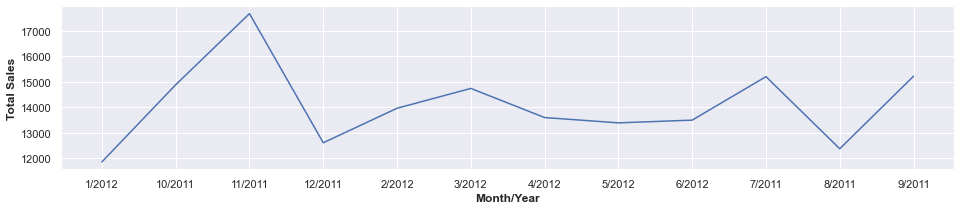

In [20]:
# Orders by month
sns.set(rc={'figure.figsize': (16,3)})
ax = sns.lineplot(x = 'MM_YYYY', y = 'count', data = orders_yr)
plt.xlabel('Month/Year', fontweight='bold')
plt.ylabel('Total Sales', fontweight='bold')

In [21]:
# Sample of 1,000,000 from coupon_visit_train
cp_visit = pd.read_csv('~/Documents/JONATHANAYALA-CAPSTONE3/DATA/coupon_visit_sample.csv', encoding='utf8', low_memory=False)
# cp_visit.head(5)

In [22]:
# cp_visit.columns
# cp_visit.info()
# cp_visit.describe()

# TOPIC: Which age groups are driving the business, and where could we do better in marketing?

In [23]:
# sales_by_area
# As a whole, Tokyo areas amount to vastly more sales than any other prefecture. Let's focus on that.

In [24]:
# users_pref
# "No Prefecture Listed" denotes a user who is not registered to Ponpare. So, the prefecture 
# with the most registered users is Tokyo.

In [25]:
# Let's look at some of the users.
users.columns

Index(['USER_ID_hash', 'REG_DATE', 'SEX_ID', 'AGE', 'WITHDRAW_DATE',
       'PREF_NAME', 'PREF_NAME_ENG'],
      dtype='object')

In [26]:
# Finding our registered users from Tokyo
tokyo_users = users[users['PREF_NAME_ENG'] == 'Tokyo']
# tokyo_users

In [27]:
tokyo_mean_age = tokyo_users['AGE'].mean()
tokyo_mean_age

42.38833922261484

In [28]:
tokyo_med_age = tokyo_users['AGE'].median()
tokyo_med_age

41.0

In [29]:
# The avg age of Tokyo users is 42, while the median is 41. This is pretty close. Let's
# visualize this
tokyo_ages = tokyo_users['AGE'].values

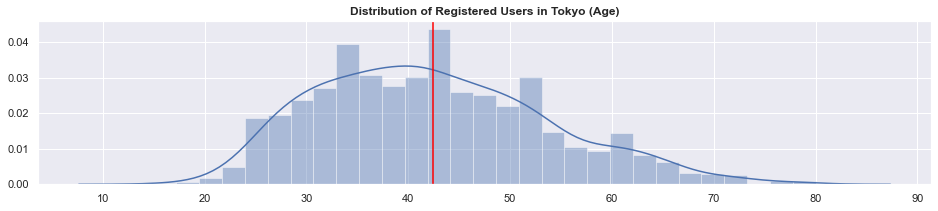

In [30]:
sns.distplot(tokyo_ages)
plt.axvline(tokyo_mean_age,0, 1, color = 'red')
plt.title('Distribution of Registered Users in Tokyo (Age)', fontweight='bold')
plt.savefig('tokyo_age_distro.png', bbox_inches = "tight")

In [31]:
tokyo_users['AGE'].min()

15

In [32]:
tokyo_users['AGE'].max()
# Users in Tokyo range from 15-80 years old, with a median of 41 and an average of 42.

80

In [33]:
# For the future, let's put ages into bins
tokyo_users['AGE'].value_counts(bins=3)

(36.667, 58.333]                1588
(14.934000000000001, 36.667]     955
(58.333, 80.0]                   287
Name: AGE, dtype: int64

In [34]:
# young (15-36)
# middle_aged (37-58)
# elderly (59-80)

In [35]:
# Creating new df to analyze sales by age and gender in Tokyo.
df = pd.read_csv('~/Documents/JONATHANAYALA-CAPSTONE3/DATA/tokyo_sales_age_gender.csv')
# df.head(5)

In [36]:
# df.columns
# df.info()
# df.describe()

In [37]:
tokyo_sales_cats = df.groupby(['genre_eng'])['purchaseid_hash'].count().sort_values(ascending=False)
tokyo_sales_cats
# This shows us which coupons are selling better, overall.

genre_eng
Delivery service            8467
Food                        8094
Other coupon                3422
Hotel and Japanese hotel    1742
Gift card                   1276
Relaxation                   906
Leisure                      817
Hair salon                   613
Nail and eye salon           480
Spa                          478
Lesson                       294
Health and medical            63
Beauty                        33
Name: purchaseid_hash, dtype: int64

In [38]:
# Adding column representing our age breakdowns
# create a list of our conditions
conditions = [
    (df['age'] >= 15) & (df['age'] <= 36),
    (df['age'] >= 37) & (df['age'] <= 58),
    (df['age'] >= 59) & (df['age'] <= 80)
    ]

# create a list of the values we want to assign for each condition
values = ['Young', 'Middle-Aged', 'Elderly']

# create a new column and use np.select to assign values to it using our lists as arguments
df['age_group'] = np.select(conditions, values)

# display updated DataFrame
df.to_csv('aged_purchasedata.csv')

# df.tail()

In [39]:
# It worked! Now to make a barplot reflecting all three together, 
# with different colors reflecting different age groups w/legend and hue for age_group

In [40]:
# Experimenting with ways to get the info I want
df_sales_age = df.groupby(['genre_eng', 'age_group'])['purchaseid_hash'].count().reset_index(name='Total Sales')
# df_sales_age

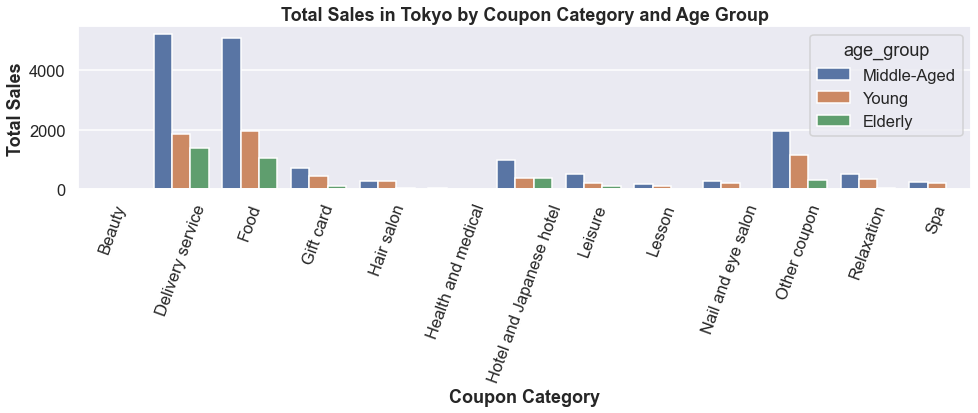

In [41]:
sns.set_style("darkgrid")
sns.set_context("talk")

ax = sns.barplot(x='genre_eng', y='Total Sales', hue = 'age_group', data = df_sales_age, ci=False)
plt.xticks(rotation=70)
plt.title('Total Sales in Tokyo by Coupon Category and Age Group', fontweight='bold')
plt.xlabel('Coupon Category', fontweight='bold')
plt.ylabel('Total Sales', fontweight='bold')
plt.savefig('sales_cat_age.png', bbox_inches = "tight")

In [42]:
# To confirm what we see in the graph, let's look at total sales by age group
sales_by_grp = df.groupby(['age_group'])['purchaseid_hash'].count().reset_index(name='Sales')
sales_by_grp

,age_group,Sales
0,Elderly,3497
1,Middle-Aged,16015
2,Young,7173


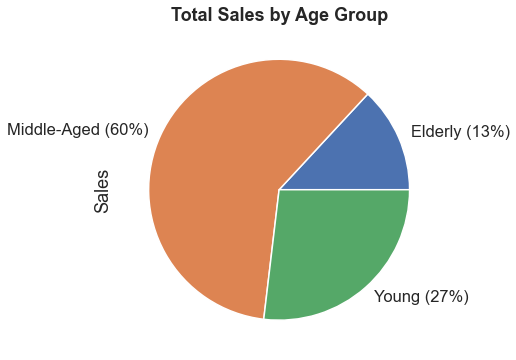

In [43]:
# Quick pie reflecting proportion of coupon sales by age group
plot = sales_by_grp.plot.pie(y='Sales', figsize=(6, 6), 
                             labels=['Elderly (13%)', 'Middle-Aged (60%)', 'Young (27%)'], legend=None)
plt.title('Total Sales by Age Group', fontweight='bold')
plt.show()


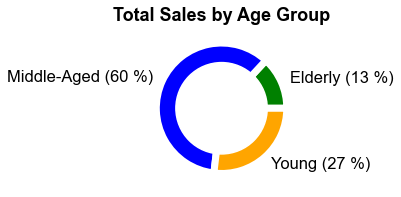

In [44]:
# Donut plot reflecting the same thing
names=[r'Elderly (13 %)', r'Middle-Aged (60 %)', 
r'Young (27 %)']
size=[3497, 16015, 7173]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')


plt.rcParams['text.color'] = 'black'
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.pie(size, labels=names, colors=['green','blue','orange'], labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Total Sales by Age Group', fontweight='bold')

# plt.savefig('donut.png', dpi=100)

plt.savefig('sales_donut.png', dpi=100)

plt.show()

In [45]:
# We see that the middle-aged group is definitely the demographic to focus on. But what about gender?

In [46]:
# Middle-aged mask
middle_age_sales = df[df['age_group'] == 'Middle-Aged']
# middle_age_sales

In [47]:
# Prepping for visualization using gender as a hue
midage_grp_gend = middle_age_sales.groupby(['genre_eng', 'sex_id'])['purchaseid_hash'].count().reset_index(name='Total Sales')
midage_grp_gend

,genre_eng,sex_id,Total Sales
0,Beauty,f,17
1,Delivery service,f,3549
2,Delivery service,m,1658
3,Food,f,2440
4,Food,m,2647
5,Gift card,f,372
6,Gift card,m,333
7,Hair salon,f,264
8,Hair salon,m,31
9,Health and medical,f,24


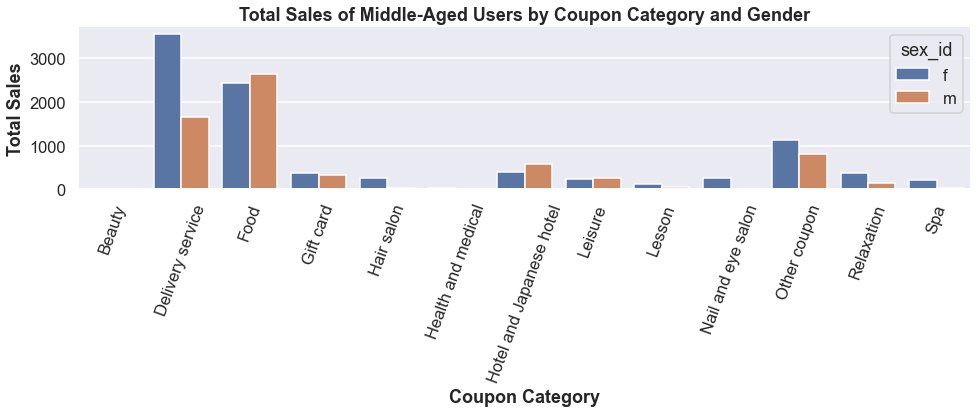

In [48]:
sns.set_style("darkgrid")
sns.set_context("talk")

ax = sns.barplot(x='genre_eng', y='Total Sales', hue = 'sex_id', data = midage_grp_gend, ci=False)
plt.xticks(rotation=70)
plt.title('Total Sales of Middle-Aged Users by Coupon Category and Gender', fontweight='bold')
plt.xlabel('Coupon Category', fontweight='bold')
plt.ylabel('Total Sales', fontweight='bold')
plt.savefig('midage_sales_gender', bbox_inches = "tight")

In [49]:
sales_by_gend = df.groupby(['sex_id'])['purchaseid_hash'].count().reset_index(name='Sales')
sales_by_gend

,sex_id,Sales
0,f,15120
1,m,11565


In [50]:
# Sales of "Leisure" coupons look almost exactly the same between genders. Let's perform a t-test to
# determine if there's a significant different between the genders.
# Null hypothesis: the mean "Leisure" sales are the same between men and women
# Alternative hypothesis: the mean sales for Leisure for women are different than for men

In [51]:
# Can't really perform that t-test. There's just not enough size.

In [52]:
female = midage_grp_gend[midage_grp_gend['sex_id'] == 'f']
# female

In [53]:
male = midage_grp_gend[midage_grp_gend['sex_id'] == 'm']
# male

In [54]:
female['Total Sales'].mean()

725.5384615384615

In [55]:
male['Total Sales'].mean()

548.5833333333334

In [56]:
# We haven't looked at prices of the coupons yet. Let's check them out, and see if people are less likely
# to purchase something cheaper or more expensive. Ultimately, we should compare spend by gender and category.

In [57]:
df.columns

Index(['user_id_hash', 'reg_date', 'sex_id', 'age', 'withdraw_date',
       'purchaseid_hash', 'i_date', 'item_count', 'sm_area_eng',
       'coupon_id_hash', 'capsule_eng', 'genre_eng', 'price_rate',
       'catalog_price', 'discount_price', 'ken_eng', 'age_group'],
      dtype='object')

In [58]:
# price_rate: the discount rate
# catalog_price: the price of something without a coupon
# discount_price: the discounted price the user pays

In [59]:
# Multiplying item_count with discount_price to see what each user actually spent per order
middle_age_sales['Total Spent'] = middle_age_sales['item_count'] * middle_age_sales['discount_price']
# middle_age_sales

/Users/jonathanayala/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
# Let's make some boxplots

In [61]:
his_totalcost = middle_age_sales[middle_age_sales['sex_id'] == 'm']
# his_totalcost

In [62]:
his_totalcost['Total Spent'].mean()

4009.345890931186

In [63]:
his_totalcost['Total Spent'].sum()

26393524

In [64]:
his_totalcost['Total Spent'].median()

1999.0

In [65]:
manspendmeansbycat = his_totalcost.groupby(['genre_eng'])['Total Spent'].mean().reset_index(name='Total Spend')
# manspendmeansbycat

In [66]:
he_spend = his_totalcost['Total Spent'].values

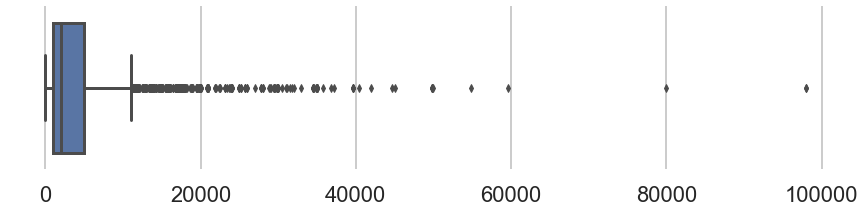

In [67]:
sns.set(rc={'figure.figsize': (15,3)})
sns.set_style("whitegrid")
sns.set_context("poster")

sns.boxplot(he_spend)
sns.despine(left=True, bottom = True)

In [68]:
her_totalcost = middle_age_sales[middle_age_sales['sex_id'] == 'f']
# her_totalcost

In [69]:
her_totalcost['Total Spent'].mean()

3428.959711620017

In [70]:
her_totalcost['Total Spent'].sum()

32341948

In [71]:
her_totalcost['Total Spent'].median()

1998.0

In [72]:
shespendmeansbycat = her_totalcost.groupby(['genre_eng'])['Total Spent'].mean().reset_index(name='Total Spend')
# shespendmeansbycat

In [73]:
she_spend = her_totalcost['Total Spent'].values

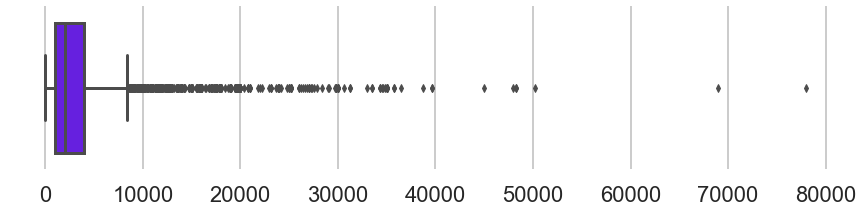

In [74]:
sns.set(rc={'figure.figsize': (15,3)})
sns.set_style("whitegrid")
sns.set_context("poster")

sns.boxplot(she_spend, color = '#5E00FF')
sns.despine(left=True, bottom = True)

Text(0, 0.5, 'Total Spend')

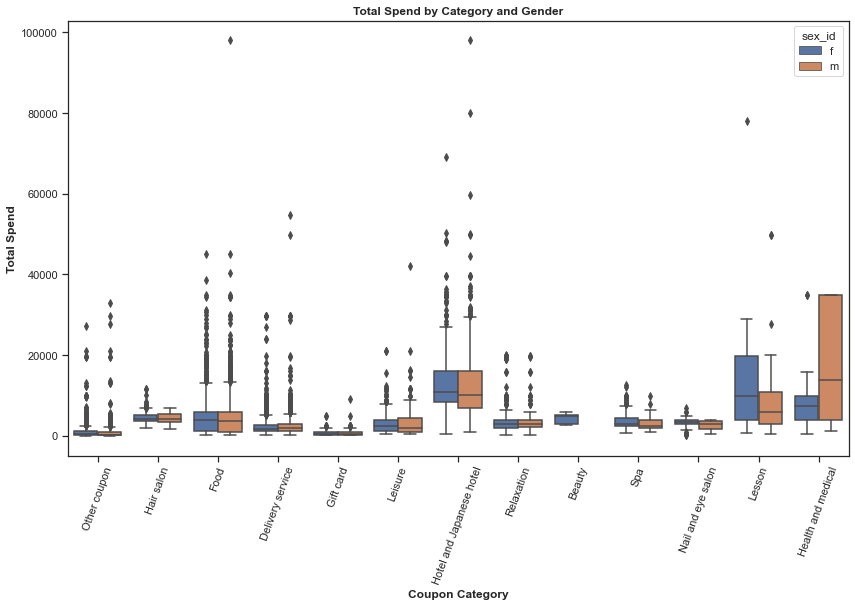

In [75]:
# Now, let's see a boxplots reflecting the prices people paid, by category
sns.set(rc={'figure.figsize': (14, 8)})


sns.set_style('ticks')
plt.xticks(rotation=70)
ax = sns.boxplot(x = 'genre_eng', y = 'Total Spent', data = middle_age_sales, hue = 'sex_id')

plt.title('Total Spend by Category and Gender', fontweight='bold')
plt.xlabel('Coupon Category', fontweight='bold')
plt.ylabel('Total Spend', fontweight='bold')

In [76]:
# Distribution of coupon prices

In [77]:
hishersspendmeansbycat = middle_age_sales.groupby(['genre_eng', 'sex_id'])['Total Spent'].mean().reset_index(name='Avg Spend')
# hishersspendmeansbycat

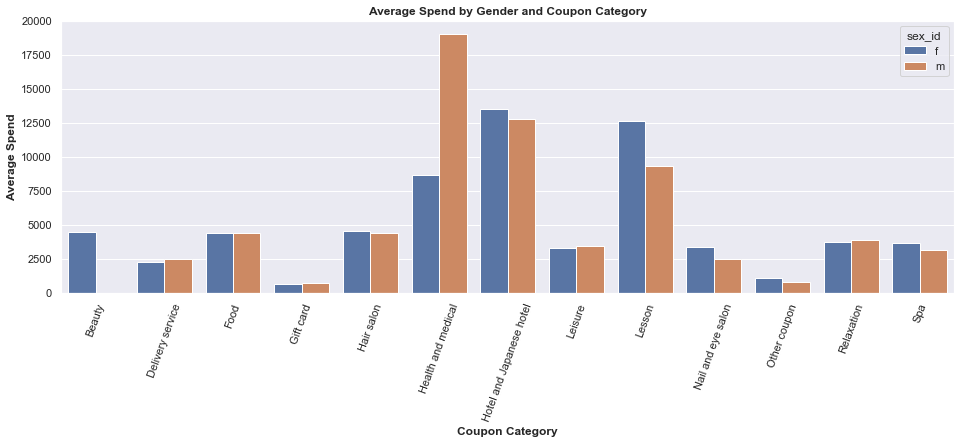

In [78]:
# Bar chart comparing spending between men and women, by coupon category
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set(rc={'figure.figsize': (16,5)})

ax = sns.barplot(x='genre_eng', y='Avg Spend', hue = 'sex_id', data = hishersspendmeansbycat, ci=False)
plt.xticks(rotation=70)
plt.title('Average Spend by Gender and Coupon Category', fontweight='bold')
plt.xlabel('Coupon Category', fontweight='bold')
plt.ylabel('Average Spend', fontweight='bold')
plt.savefig('avg_spend_gend', bbox_inches = "tight")

In [79]:
# Let's do the same as above, except total spend instead of total average spend, for accuracy
hishersspendsumsbycat = middle_age_sales.groupby(['genre_eng', 'sex_id'])['Total Spent'].sum().reset_index(name= 'Total Spend')
# hishersspendsumsbycat

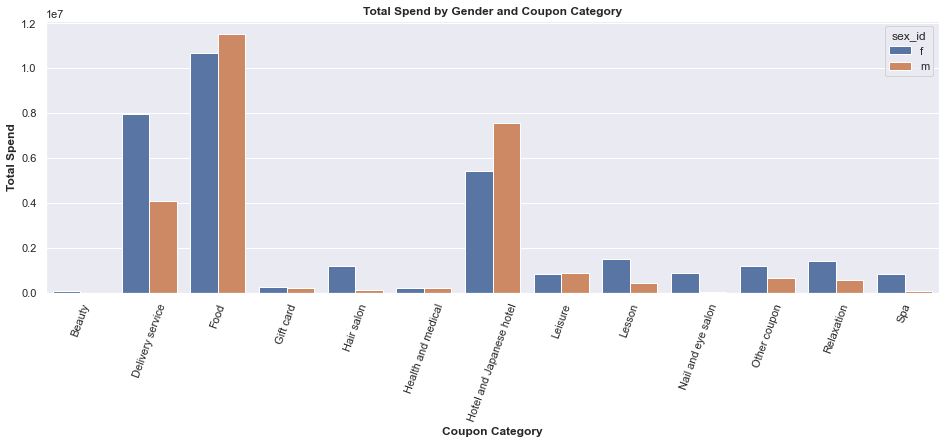

In [80]:
# Bar chart comparing spending between men and women, by coupon category
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set(rc={'figure.figsize': (16,5)})

ax = sns.barplot(x='genre_eng', y='Total Spend', hue = 'sex_id', data = hishersspendsumsbycat, ci=False)
plt.xticks(rotation=70)
plt.title('Total Spend by Gender and Coupon Category', fontweight='bold')
plt.xlabel('Coupon Category', fontweight='bold')
plt.ylabel('Total Spend', fontweight='bold')
plt.savefig('total_spend_gend', bbox_inches = "tight")

In [81]:
# Let's compare the above with average total cost by coupon category (assuming only one is purchased).
# Is one gender more likely to spend more on the more expensive coupons?

In [82]:
df.columns

Index(['user_id_hash', 'reg_date', 'sex_id', 'age', 'withdraw_date',
       'purchaseid_hash', 'i_date', 'item_count', 'sm_area_eng',
       'coupon_id_hash', 'capsule_eng', 'genre_eng', 'price_rate',
       'catalog_price', 'discount_price', 'ken_eng', 'age_group'],
      dtype='object')

In [83]:
avg_coupon_costs = df.groupby(['genre_eng'])['discount_price'].mean().reset_index(name='Avg Cost')
# avg_coupon_costs

Text(0, 0.5, 'Average Cost')

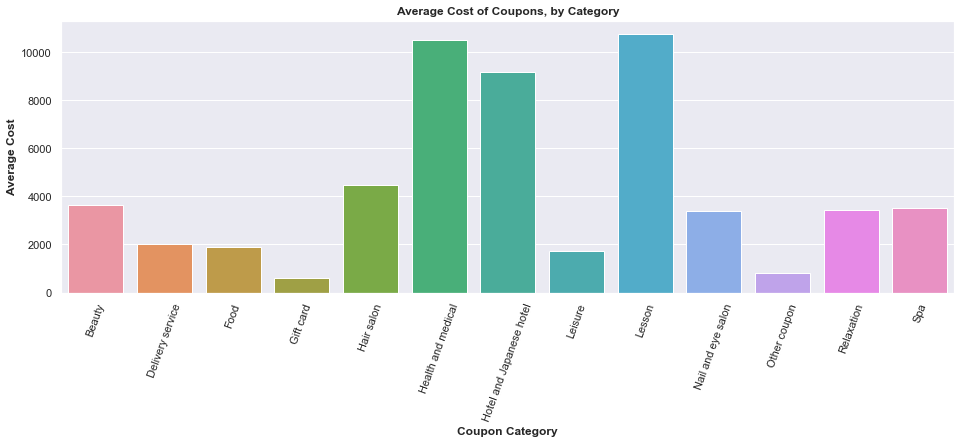

In [84]:
# Distplot of average coupon prices by category
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set(rc={'figure.figsize': (16,5)})

ax = sns.barplot(x='genre_eng', y='Avg Cost', data = avg_coupon_costs, ci=False)
plt.xticks(rotation=70)
plt.title('Average Cost of Coupons, by Category', fontweight='bold')
plt.xlabel('Coupon Category', fontweight='bold')
plt.ylabel('Average Cost', fontweight='bold')

In [85]:
# middle_age_sales

In [86]:
salesbygend = middle_age_sales.groupby(['sex_id'])['purchaseid_hash'].count().reset_index(name='Total')
salesbygend

,sex_id,Total
0,f,9432
1,m,6583


In [87]:
middle_age_sales.to_csv('middle_age_sales.csv')

In [88]:
# Chi2 test, testing if gender, and coupon category are independent

In [89]:
middle_age_sales['sex_id'].value_counts()

f    9432
m    6583
Name: sex_id, dtype: int64

In [90]:
middle_age_sales['genre_eng'].value_counts()

Delivery service            5207
Food                        5087
Other coupon                1956
Hotel and Japanese hotel     992
Gift card                    705
Relaxation                   527
Leisure                      505
Hair salon                   295
Nail and eye salon           272
Spa                          250
Lesson                       167
Health and medical            35
Beauty                        17
Name: genre_eng, dtype: int64

In [91]:
observed = pd.crosstab(df['genre_eng'], df['sex_id'])
observed

sex_id,f,m
genre_eng,,
Beauty,30,3
Delivery service,5458,3009
Food,3675,4419
Gift card,654,622
Hair salon,505,108
Health and medical,47,16
Hotel and Japanese hotel,661,1081
Leisure,379,438
Lesson,216,78


In [92]:
# Null hypothesis is that the category of coupon and the gender of the customer are independent.
# Alternative hypothesis is that they are NOT independent of eachother (you are definitely more inclined
# to buy BECAUSE of your gender.)

In [93]:
chi2, p, dof, expected = chi2_contingency(observed.values)
print(f'The test statistic is {chi2}. \nThe p value is {p}.')

The test statistic is 1747.4562284471865. 
The p value is 0.0.


In [94]:
# So, based on the data we've been given, gender and category may NOT independent of eachother. 
# In other words, it's not so unlikely that purchase in a specific category is based on chance.